# Challenge 3

In [1]:
# import libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#### Import the titanic file. Name your dataset `titanic`.

In [2]:
titanic = pd.read_csv('./titanic.csv',low_memory=False)
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes

In [3]:
#your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?

*Hint: Use Pandas `select_dtypes`*

In [4]:
# your code here- numerical variable
numerical_variables = titanic.select_dtypes(include='number')
numerical_variables.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
dtype: object

In [5]:
#your code here- categorical variable
categorical_variables = titanic.select_dtypes(include=['object'])
categorical_variables.dtypes

Name        object
Gender      object
Ticket      object
Cabin       object
Embarked    object
dtype: object

#### Set the plot style to `classic` and the figure size to `(12,6)`

*Hint: To set the style you can use `matplotlib.pyplot` functions or seaborn*

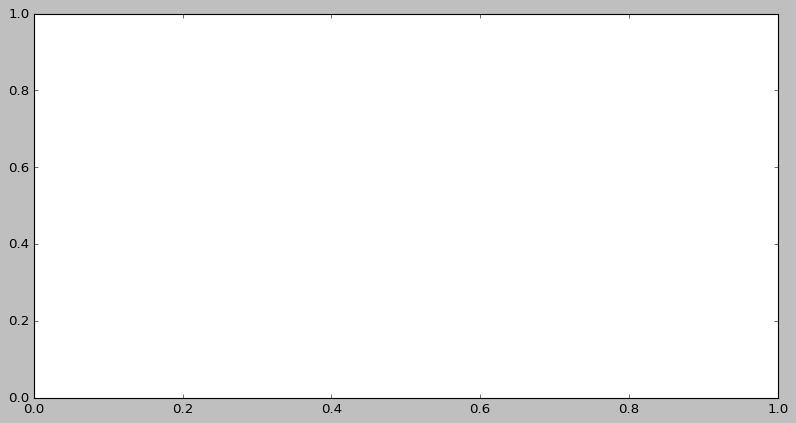

In [6]:
# your code here
# your code here
plt.style.use('classic')
fid, ax = plt.subplots(figsize=(12,6))

#### Use the appropriate visulalization to show the distribution of the column `Age`

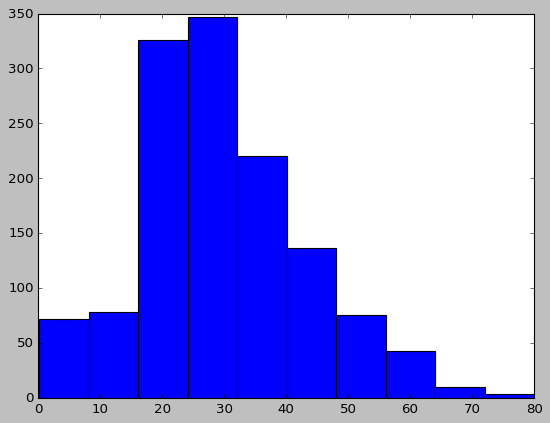

In [40]:
# your code here
ages = titanic['Age']

plt.hist(ages)
plt.show();

#### Use subplots to plot the distribution of the `Age` variable with bins equal to `10`, `20` and `50`.

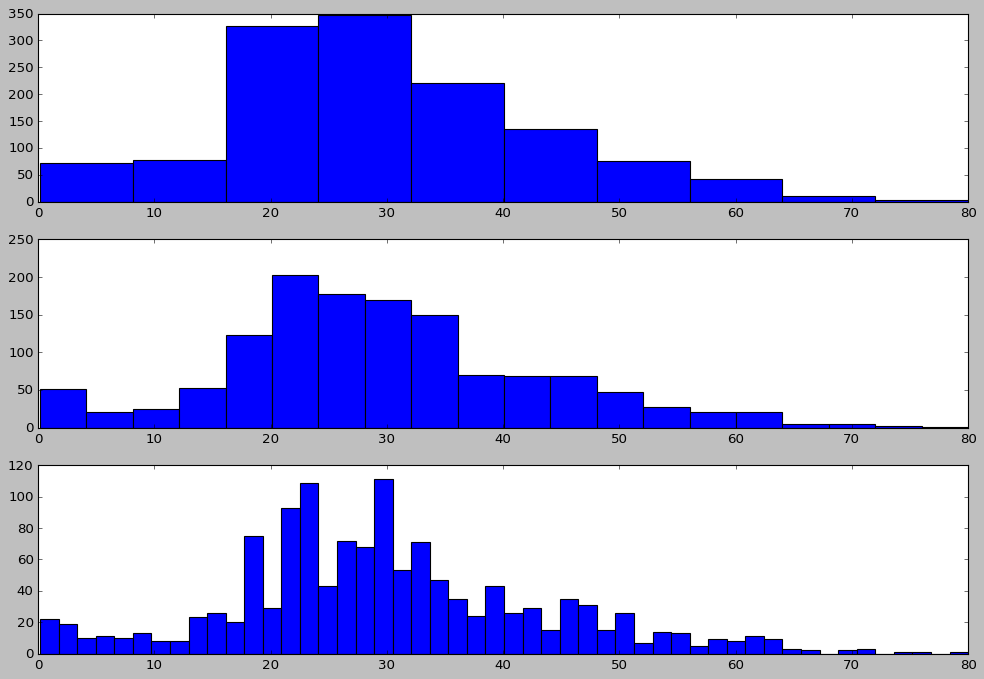

In [39]:
# your code here)
fig, [ax_1, ax_2, ax_3] = plt.subplots(3,1 , figsize=(15, 10))
ax_1.hist(ages, bins=10)
ax_2.hist(ages, bins=20)
ax_3.hist(ages, bins=50)
plt.show();

#### Whether the bin size affects your plot? Why?

In [9]:
#your comment here
## 

#### Use seaborn to show the distribution of the column `Age`

<AxesSubplot:xlabel='Age', ylabel='Count'>

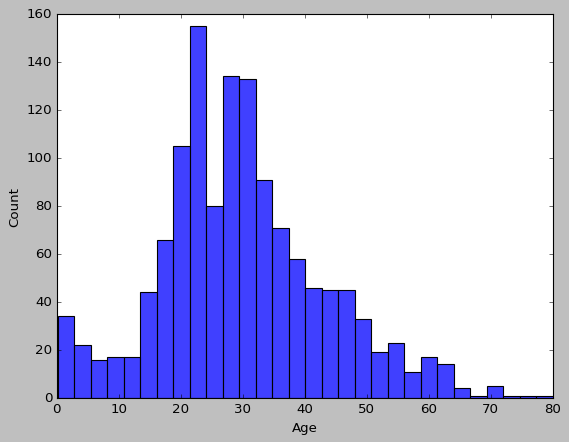

In [43]:
# your code here
sns.histplot(ages)

#### Use the appropriate plot to visualize the column `Gender`. There are 2 ways of doing it. Do it both ways.

*Hint: Use matplotlib and seaborn*

        Gender
Gender        
female     466
male       843


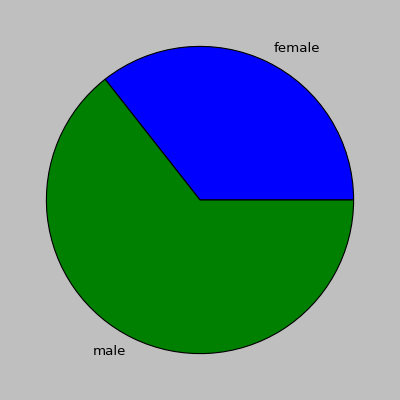

In [35]:
# your code here- 1st way
gender = titanic.groupby('Gender').agg({'Gender': 'count'})
print(gender)
plt.pie(gender['Gender'], labels=['female', 'male'])
plt.show()

<AxesSubplot:xlabel='Gender', ylabel='Count'>

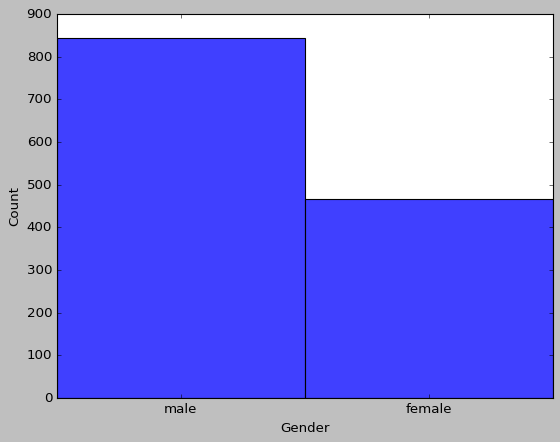

In [12]:
# your code here- 2nd way

sns.histplot(gender)

#### Use the appropriate plot to visualize the column `Pclass` 


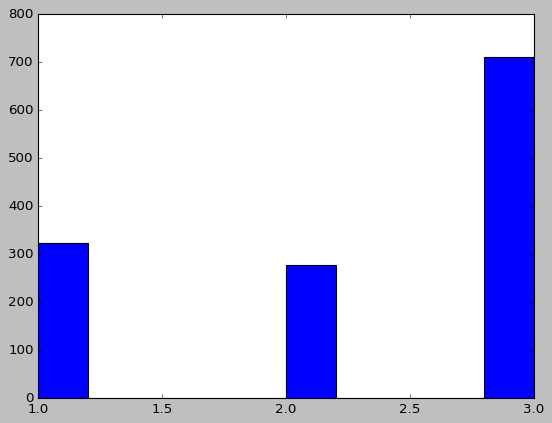

In [45]:
# your code here
passenger_class = titanic['Pclass']

plt.hist(passenger_class)
plt.show();

#### We would like to have in one single plot the summary statistics of the feature `Age`. Choose the appropriate plot to show below.

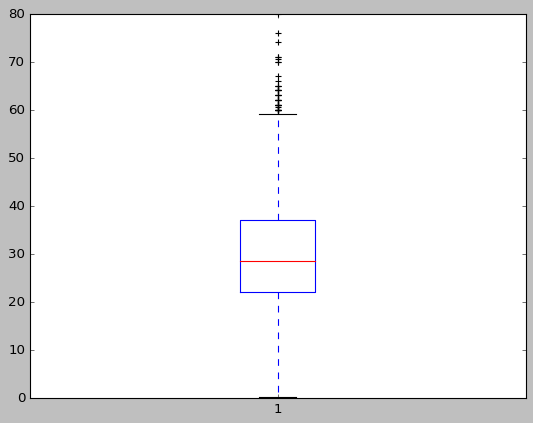

In [47]:
# your code here
plt.boxplot(ages)
plt.show()

#### What does the previous plot tell you about the feature `Age`? Comment.

In [38]:
# your comment here
ages.describe()

#The box plot show us that the age of the victims were concentrated between  20 - 37 years

count    1309.000000
mean       29.879186
std        13.448335
min         0.170000
25%        22.000000
50%        28.500000
75%        37.000000
max        80.000000
Name: Age, dtype: float64

#### Now in addition to the summary statistics, we also want to visualize the distribution of `Age`. Choose the appropriate plot to sow below.

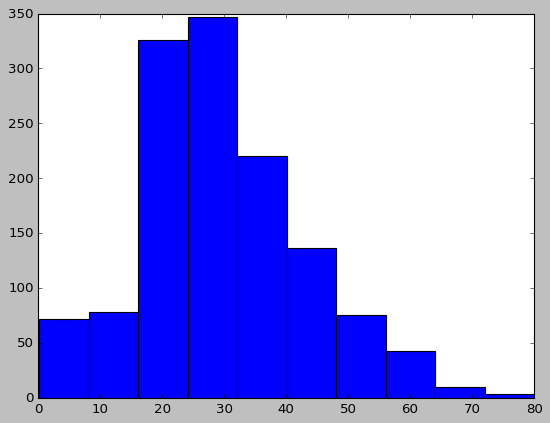

In [48]:
#your code here
plt.hist(ages)
plt.show();

#### What additional information in the previous plot provide you about the feature `Age`? Comment.

In [17]:
#your comment here


#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the appropriate plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.

*Hint: One of the ways involves using Seaborn*

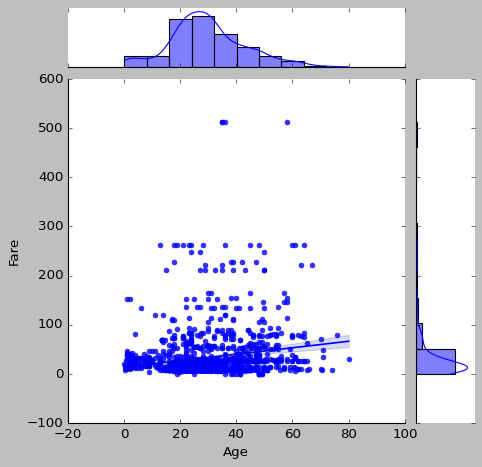

In [52]:
#your code-1st way
sns.jointplot(x=titanic['Age'], 
              y=titanic['Fare'], 
              kind='reg', marginal_kws=dict(bins=10))


In [19]:
# your code-2nd way


#### Using Seaborn plot the correlation matrix of various features.

*Hint: search how to use `heatmap`*

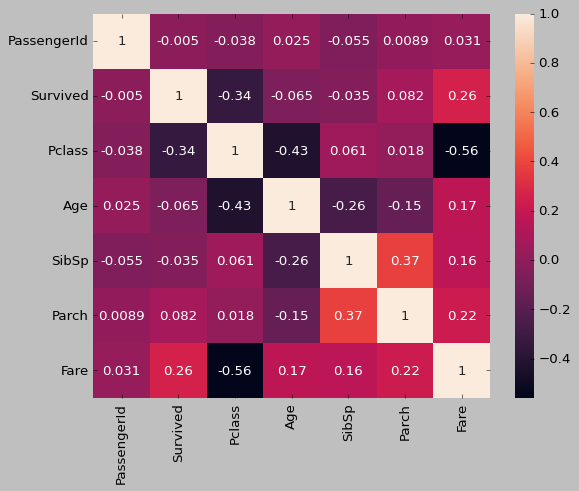

In [54]:
#your code here
sns.heatmap(titanic.corr(), annot=True, cmap='rocket');

#### According to the previous plot, what are the most correlated feature? Comment.

In [21]:
#your comment here
# Fare and Pclass

#### Use the appropriate plot to display the summary statistics of the `Age` in function of the `Pclass`.

*Hint: use boxplot to display summary statistics of `Age` in relation to each of the discrete values of `Pclass`*

<AxesSubplot:>

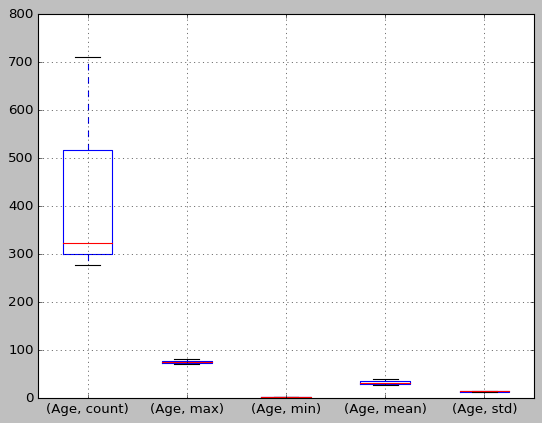

In [115]:
#your code here

pclass_per_age = titanic.groupby('Pclass').agg({'Age': ['count', 'max', 'min', 'mean', 'std']})

pclass_per_age.boxplot()


#### Use the appropriate plot to display the distributions of  `Age` in relation to  `Gender`.

*Hint: use Facetgrid to display the distribution of `Age` for each categorical value of `Gender`*

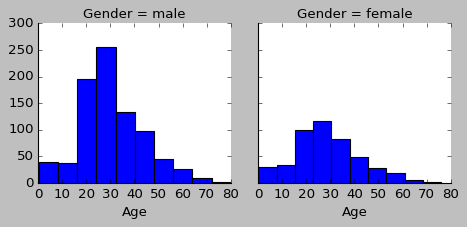

In [113]:
#your code here

gender = sns.FacetGrid(data = titanic, col = 'Gender')
gender.map(plt.hist, 'Age')